In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [2]:
realData = pd.read_csv('True.csv',engine='python', error_bad_lines=False)
realData

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [3]:
fakeData = pd.read_csv('Fake.csv',engine='python', error_bad_lines=False)
fakeData

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
merged = pd.concat([realData, fakeData], axis=0, ignore_index=True)
merged

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:
# Add a class column with 0s for the first 21417 rows and 1s for the rest
merged['class_label'] = np.where(merged.index < 21417, 0, 1)
merged

,title,text,subject,date,class_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [6]:
merged.loc[21410:21430]

,title,text,subject,date,class_label
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",0
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",0
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0
21417,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
21418,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
21419,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1


In [7]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        44898 non-null  object
 1   text         44898 non-null  object
 2   subject      44898 non-null  object
 3   date         44898 non-null  object
 4   class_label  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [8]:
# Check number of null values in each column
merged.isnull().sum()

title          0
text           0
subject        0
date           0
class_label    0
dtype: int64

In [9]:
from datetime import datetime
from dateutil import parser

# dates in the format "December 31, 2017"
# Convert standard datetime format using a custom function
def parse_date(date_string):
    try:
        # Parse the date using dateutil's parser
        parsed_date = parser.parse(date_string)
        return parsed_date
    except:
        # Handle exceptions, return None for invalid dates
        return None
# Apply the custom function to the 'date_column'
merged['date'] = merged['date'].apply(parse_date)
merged

,title,text,subject,date,class_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,2016-01-16,1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,2016-01-16,1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,2016-01-15,1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,2016-01-14,1


In [10]:
# Check number of null values in each column
merged.isnull().sum()

title           0
text            0
subject         0
date           10
class_label     0
dtype: int64

In [11]:
# Select rows with null values in the specified column
null_value_rows = merged[merged['date'].isnull()]
null_value_rows

,title,text,subject,date,class_label
30775,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,NaT,1
36924,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,NaT,1
36925,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,NaT,1
37256,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT,1
37257,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT,1
38849,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT,1
38850,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT,1
40350,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,NaT,1
43286,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT,1
43287,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT,1


In [12]:
null_indices = merged[merged.isnull().any(axis=1)].index #take indices of the records with null values in date
new_df = pd.concat([realData, fakeData], axis=0, ignore_index=True)
new_df = new_df.loc[null_indices]
new_df

,title,text,subject,date
30775,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...
36924,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...
36925,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...
37256,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...
37257,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...
38849,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...
38850,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...
40350,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...
43286,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...
43287,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...


In [13]:
# Drop rows with null values in column 'date'
merged.dropna(subset=['date'], inplace=True)
merged

,title,text,subject,date,class_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,2016-01-16,1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,2016-01-16,1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,2016-01-15,1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,2016-01-14,1


In [14]:
# Check number of null values in each column
merged.isnull().sum()

title          0
text           0
subject        0
date           0
class_label    0
dtype: int64

In [15]:
#Sort values by date in train and test
merged = merged.sort_values(by='date', ascending=True)
merged

,title,text,subject,date,class_label
37304,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,2015-03-31,1
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,2015-03-31,1
37307,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,politics,2015-03-31,1
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,left-news,2015-03-31,1
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",left-news,2015-03-31,1
...,...,...,...,...,...
30470,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,politics,2018-02-18,1
30475,IT BEGINS…RINO MEGA-DONOR Threatens Jeb Bush: ...,A longtime Republican Party donor based in Flo...,politics,2018-02-18,1
30469,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,politics,2018-02-19,1
30468,MSNBC ANCHOR Flabbergasted at What Texas Teach...,If we protect every other government building ...,politics,2018-02-19,1


In [16]:
# Separate x_train, y_train,x_test and y_test after separating features and labels
merged_df_features = merged.drop(['class_label'], axis = 1) # Dropping target label from features set
merged_df_labels = merged['class_label'] # Target label
merged_df_features

,title,text,subject,date
37304,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,2015-03-31
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,2015-03-31
37307,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,politics,2015-03-31
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,left-news,2015-03-31
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",left-news,2015-03-31
...,...,...,...,...
30470,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,politics,2018-02-18
30475,IT BEGINS…RINO MEGA-DONOR Threatens Jeb Bush: ...,A longtime Republican Party donor based in Flo...,politics,2018-02-18
30469,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,politics,2018-02-19
30468,MSNBC ANCHOR Flabbergasted at What Texas Teach...,If we protect every other government building ...,politics,2018-02-19


In [17]:
merged_df_labels = pd.DataFrame(merged_df_labels)
merged_df_labels

,class_label
37304,1
37306,1
37307,1
43336,1
43335,1
...,...
30470,1
30475,1
30469,1
30468,1


In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(merged_df_features,merged_df_labels, test_size=0.2, shuffle=False)

print("y_train:\n", y_train.value_counts())
print("y_test:\n", y_test.value_counts())
x_train

y_train:
 class_label
1              22088
0              13822
dtype: int64
y_test:
 class_label
0              7595
1              1383
dtype: int64


,title,text,subject,date
37304,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,2015-03-31
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,2015-03-31
37307,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,politics,2015-03-31
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,left-news,2015-03-31
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",left-news,2015-03-31
...,...,...,...,...
17560,"U.N. condemns anti-gay crackdowns in Egypt, Az...","GENEVA (Reuters) - Azerbaijan, Egypt and Indon...",worldnews,2017-10-13
17559,Kurd forces move back defense line around Kirk...,"KIRKUK, Iraq (Reuters) - Kurdish forces have m...",worldnews,2017-10-13
17558,Kenya's Odinga says October poll would be illegal,LONDON (Reuters) - Kenya s opposition leader R...,worldnews,2017-10-13
17557,Israel buoyed by Trump tack against Iran atom ...,JERUSALEM (Reuters) - Israel was upbeat about ...,worldnews,2017-10-13


In [19]:
y_train

,class_label
37304,1
37306,1
37307,1
43336,1
43335,1
...,...
17560,0
17559,0
17558,0
17557,0


In [20]:
x_test

,title,text,subject,date
17555,Mother of Rwandan president's challenger tells...,KIGALI (Reuters) - The mother and sister of a ...,worldnews,2017-10-13
17554,Iran says will respond strongly to any action ...,ANKARA (Reuters) - Iran said on Friday it woul...,worldnews,2017-10-13
17553,Trump strikes blow at Iran nuclear deal in maj...,WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,2017-10-13
17552,Syrian fighter pilot on trial for espionage in...,ISTANBUL (Reuters) - A Syrian fighter pilot wh...,worldnews,2017-10-13
17551,Venezuela ex-prosecutor gives U.S. evidence on...,GENEVA (Reuters) - Venezuela s former chief pr...,worldnews,2017-10-13
...,...,...,...,...
30470,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,politics,2018-02-18
30475,IT BEGINS…RINO MEGA-DONOR Threatens Jeb Bush: ...,A longtime Republican Party donor based in Flo...,politics,2018-02-18
30469,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,politics,2018-02-19
30468,MSNBC ANCHOR Flabbergasted at What Texas Teach...,If we protect every other government building ...,politics,2018-02-19


In [21]:
y_test

,class_label
17555,0
17554,0
17553,0
17552,0
17551,0
...,...
30470,1
30475,1
30469,1
30468,1


In [22]:
train_df = pd.concat([x_train, y_train], axis=1, join='inner')
train_df

,title,text,subject,date,class_label
37304,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,2015-03-31,1
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,2015-03-31,1
37307,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,politics,2015-03-31,1
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,left-news,2015-03-31,1
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",left-news,2015-03-31,1
...,...,...,...,...,...
17560,"U.N. condemns anti-gay crackdowns in Egypt, Az...","GENEVA (Reuters) - Azerbaijan, Egypt and Indon...",worldnews,2017-10-13,0
17559,Kurd forces move back defense line around Kirk...,"KIRKUK, Iraq (Reuters) - Kurdish forces have m...",worldnews,2017-10-13,0
17558,Kenya's Odinga says October poll would be illegal,LONDON (Reuters) - Kenya s opposition leader R...,worldnews,2017-10-13,0
17557,Israel buoyed by Trump tack against Iran atom ...,JERUSALEM (Reuters) - Israel was upbeat about ...,worldnews,2017-10-13,0


In [23]:
# Value counts
print(y_train.class_label.value_counts())
print(y_test.class_label.value_counts())

1    22088
0    13822
Name: class_label, dtype: int64
0    7595
1    1383
Name: class_label, dtype: int64


### When coming to time series data, the temporal sequence takes priority over balance in the data. Maintaining the chronological order of the data is crucial in time series analysis because the order of observations carries valuable information. The past informs the future in time series data, and the model's ability to capture temporal patterns is essential for accurate predictions.

In [24]:
# Data shape
print(train_df.shape)
print(x_test.shape)

(35910, 5)
(8978, 4)


In [25]:
print(train_df['subject'].unique())
print(train_df['subject'].nunique())

['politics' 'left-news' 'Government News' 'News' 'US_News' 'Middle-east'
 'politicsNews' 'worldnews']
8


when working with time-series data, it is crucial to order the data records by date and time before splitting the dataset into train and test sets. Time-series data points are collected in chronological order, and the order of the data points is important because past observations are often used to predict future values.

When you split the data into training and testing sets, you want to simulate a real-world scenario where you train your model on past data and then use that model to make predictions on future, unseen data. If the data points are not ordered by date and time, your model might learn patterns that don't actually exist in the real data, leading to inaccurate predictions.

Therefore, always ensure that you maintain the chronological order of the data records when splitting your time-series dataset into training and testing sets. Typically, you would use the oldest data for training and the most recent data for testing to evaluate how well your model generalizes to unseen future observations.

In [26]:
from sklearn.preprocessing import LabelEncoder

column_name = 'subject'

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the specified column
train_df[column_name + '_encoded'] = label_encoder.fit_transform(train_df[column_name])
x_test[column_name + '_encoded'] = label_encoder.fit_transform(x_test[column_name])

# Drop the original categorical columns
train_df = train_df.drop(columns='subject')
train_df = pd.DataFrame(train_df)

x_test = x_test.drop(columns='subject')
x_test = pd.DataFrame(x_test)
train_df

,title,text,date,class_label,subject_encoded
37304,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,5
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,2015-03-31,1,5
37307,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,5
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,4
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,4
...,...,...,...,...,...
17560,"U.N. condemns anti-gay crackdowns in Egypt, Az...","GENEVA (Reuters) - Azerbaijan, Egypt and Indon...",2017-10-13,0,7
17559,Kurd forces move back defense line around Kirk...,"KIRKUK, Iraq (Reuters) - Kurdish forces have m...",2017-10-13,0,7
17558,Kenya's Odinga says October poll would be illegal,LONDON (Reuters) - Kenya s opposition leader R...,2017-10-13,0,7
17557,Israel buoyed by Trump tack against Iran atom ...,JERUSALEM (Reuters) - Israel was upbeat about ...,2017-10-13,0,7


In [27]:
x_test['subject_encoded'].unique()

array([7, 6, 3, 4, 2, 1, 0, 5])

Adding columns

In [28]:
# Extract day of the week, date, month, and year into new columns
train_df['day_of_week'] = train_df['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
train_df['day'] = train_df['date'].dt.day
train_df['month'] = train_df['date'].dt.month
train_df['year'] = train_df['date'].dt.year

x_test['day_of_week'] = x_test['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
x_test['day'] = x_test['date'].dt.day
x_test['month'] = x_test['date'].dt.month
x_test['year'] = x_test['date'].dt.year

train_df

,title,text,date,class_label,subject_encoded,day_of_week,day,month,year
37304,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,5,1,31,3,2015
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,2015-03-31,1,5,1,31,3,2015
37307,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,5,1,31,3,2015
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,4,1,31,3,2015
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,4,1,31,3,2015
...,...,...,...,...,...,...,...,...,...
17560,"U.N. condemns anti-gay crackdowns in Egypt, Az...","GENEVA (Reuters) - Azerbaijan, Egypt and Indon...",2017-10-13,0,7,4,13,10,2017
17559,Kurd forces move back defense line around Kirk...,"KIRKUK, Iraq (Reuters) - Kurdish forces have m...",2017-10-13,0,7,4,13,10,2017
17558,Kenya's Odinga says October poll would be illegal,LONDON (Reuters) - Kenya s opposition leader R...,2017-10-13,0,7,4,13,10,2017
17557,Israel buoyed by Trump tack against Iran atom ...,JERUSALEM (Reuters) - Israel was upbeat about ...,2017-10-13,0,7,4,13,10,2017


In [29]:
# Create a new column 'word_count' containing the word count of each text
train_df['title_word_count'] = train_df['title'].apply(lambda x: len(str(x).split()))
train_df['text_word_count'] = train_df['text'].apply(lambda x: len(str(x).split()))

x_test['title_word_count'] = x_test['title'].apply(lambda x: len(str(x).split()))
x_test['text_word_count'] = x_test['text'].apply(lambda x: len(str(x).split()))
train_df

,title,text,date,class_label,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count
37304,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,5,1,31,3,2015,15,123
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,2015-03-31,1,5,1,31,3,2015,20,493
37307,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,5,1,31,3,2015,12,322
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,4,1,31,3,2015,12,322
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,4,1,31,3,2015,15,123
...,...,...,...,...,...,...,...,...,...,...,...
17560,"U.N. condemns anti-gay crackdowns in Egypt, Az...","GENEVA (Reuters) - Azerbaijan, Egypt and Indon...",2017-10-13,0,7,4,13,10,2017,8,360
17559,Kurd forces move back defense line around Kirk...,"KIRKUK, Iraq (Reuters) - Kurdish forces have m...",2017-10-13,0,7,4,13,10,2017,11,124
17558,Kenya's Odinga says October poll would be illegal,LONDON (Reuters) - Kenya s opposition leader R...,2017-10-13,0,7,4,13,10,2017,8,603
17557,Israel buoyed by Trump tack against Iran atom ...,JERUSALEM (Reuters) - Israel was upbeat about ...,2017-10-13,0,7,4,13,10,2017,15,703


In [30]:
from textblob import TextBlob

# Function to calculate sentiment score using TextBlob
def calculate_sentiment(text):
    analysis = TextBlob(text)
    # Return the polarity score (ranges from -1 to 1, where negative values indicate negative sentiment)
    return analysis.sentiment.polarity

# Create a new column 'sentiment_score' containing the sentiment score of each text
train_df['sentiment_score_title'] = train_df['title'].apply(calculate_sentiment)
train_df['sentiment_score_text'] = train_df['text'].apply(calculate_sentiment)
x_test['sentiment_score_title'] = x_test['title'].apply(calculate_sentiment)
x_test['sentiment_score_text'] = x_test['text'].apply(calculate_sentiment)

# Print the updated DataFrame with sentiment scores
train_df

,title,text,date,class_label,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text
37304,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,5,1,31,3,2015,15,123,0.10,0.214286
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,2015-03-31,1,5,1,31,3,2015,20,493,0.25,0.102236
37307,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,5,1,31,3,2015,12,322,0.50,0.200397
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,4,1,31,3,2015,12,322,0.50,0.200397
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,4,1,31,3,2015,15,123,0.10,0.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560,"U.N. condemns anti-gay crackdowns in Egypt, Az...","GENEVA (Reuters) - Azerbaijan, Egypt and Indon...",2017-10-13,0,7,4,13,10,2017,8,360,0.00,0.076488
17559,Kurd forces move back defense line around Kirk...,"KIRKUK, Iraq (Reuters) - Kurdish forces have m...",2017-10-13,0,7,4,13,10,2017,11,124,0.00,0.200000
17558,Kenya's Odinga says October poll would be illegal,LONDON (Reuters) - Kenya s opposition leader R...,2017-10-13,0,7,4,13,10,2017,8,603,-0.50,0.156456
17557,Israel buoyed by Trump tack against Iran atom ...,JERUSALEM (Reuters) - Israel was upbeat about ...,2017-10-13,0,7,4,13,10,2017,15,703,-0.05,-0.021411


In [31]:
# Out of different score combining strategies like Weighted average, product, difference, product, threshold values and sum, sum has been chosen
# for combining both 'sentiment_score_title' and 'sentiment_score_text', as it is the simplest and gives more insight while giving equal importance to both the columns,
# when compared to product or difference, where the result could be far off from the individual column values.

# Add a new column 'sentiment_scores_sum' which is the sum of 'sentiment_score_title' and 'sentiment_score_text'
train_df['sentiment_scores_sum'] = train_df['sentiment_score_title'] + train_df['sentiment_score_text']
x_test['sentiment_scores_sum'] = x_test['sentiment_score_title'] + x_test['sentiment_score_text']
train_df

,title,text,date,class_label,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum
37304,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,5,1,31,3,2015,15,123,0.10,0.214286,0.314286
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,2015-03-31,1,5,1,31,3,2015,20,493,0.25,0.102236,0.352236
37307,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,5,1,31,3,2015,12,322,0.50,0.200397,0.700397
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,4,1,31,3,2015,12,322,0.50,0.200397,0.700397
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,4,1,31,3,2015,15,123,0.10,0.214286,0.314286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560,"U.N. condemns anti-gay crackdowns in Egypt, Az...","GENEVA (Reuters) - Azerbaijan, Egypt and Indon...",2017-10-13,0,7,4,13,10,2017,8,360,0.00,0.076488,0.076488
17559,Kurd forces move back defense line around Kirk...,"KIRKUK, Iraq (Reuters) - Kurdish forces have m...",2017-10-13,0,7,4,13,10,2017,11,124,0.00,0.200000,0.200000
17558,Kenya's Odinga says October poll would be illegal,LONDON (Reuters) - Kenya s opposition leader R...,2017-10-13,0,7,4,13,10,2017,8,603,-0.50,0.156456,-0.343544
17557,Israel buoyed by Trump tack against Iran atom ...,JERUSALEM (Reuters) - Israel was upbeat about ...,2017-10-13,0,7,4,13,10,2017,15,703,-0.05,-0.021411,-0.071411


In [32]:
print(train_df.class_label.value_counts())
print(train_df.shape)
print(train_df.info())

for column in train_df.columns:
    print(f"Column: {column}")
    print(f"Data Type: {train_df[column].dtypes}")
    print(f"Unique Values: {train_df[column].unique()}")
    print(f"Number of Unique Values: {len(train_df[column].unique())}")
    print("\n" + "="*30 + "\n")

1    22088
0    13822
Name: class_label, dtype: int64
(35910, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35910 entries, 37304 to 17556
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  35910 non-null  object        
 1   text                   35910 non-null  object        
 2   date                   35910 non-null  datetime64[ns]
 3   class_label            35910 non-null  int64         
 4   subject_encoded        35910 non-null  int64         
 5   day_of_week            35910 non-null  int64         
 6   day                    35910 non-null  int64         
 7   month                  35910 non-null  int64         
 8   year                   35910 non-null  int64         
 9   title_word_count       35910 non-null  int64         
 10  text_word_count        35910 non-null  int64         
 11  sentiment_score_title  35910 non-null  float64   

In [33]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

def add_trend_seasonality_residual(df, trend_strength=0.03, seasonality_strength=0.1):
    df['trend'] = np.arange(len(df)) * trend_strength
    df['seasonality'] = np.sin(2 * np.pi * df['date'].dt.dayofyear / 365)
    df['residual'] = np.random.normal(scale=seasonality_strength, size=len(df))
    return df

def evaluate_model(df, trend_strength, seasonality_strength):
    df_copy = df.copy()
    df_copy['modeled'] = df_copy['trend'] + df_copy['seasonality'] + df_copy['residual']
    mse = mean_squared_error(df_copy['class_label'], df_copy['modeled'])
    rmse = np.sqrt(mse)
    return rmse

# Assuming train_df is already available with 'date' and 'class_label' columns
# No need for a placeholder 'class_label' column

# Perform Grid Search
best_rmse = float('inf')
best_trend_strength = None
best_seasonality_strength = None

for trend_strength in [0.01, 0.02, 0.03, 0.04, 0.05]:
    for seasonality_strength in [0.1, 0.15, 0.2, 0.25, 0.3]:
        # Add features directly to the original train_df
        add_trend_seasonality_residual(train_df, trend_strength, seasonality_strength)
        rmse = evaluate_model(train_df, trend_strength, seasonality_strength)

        if rmse < best_rmse:
            best_rmse = rmse
            best_trend_strength = trend_strength
            best_seasonality_strength = seasonality_strength

print(f'Best Trend Strength: {best_trend_strength}')
print(f'Best Seasonality Strength: {best_seasonality_strength}')
print(f'Best RMSE: {best_rmse}')

train_df

Best Trend Strength: 0.01
Best Seasonality Strength: 0.3
Best RMSE: 206.72994587881047


,title,text,date,class_label,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,trend,seasonality,residual
37304,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,5,1,31,3,2015,15,123,0.10,0.214286,0.314286,0.00,0.999769,0.117768
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,2015-03-31,1,5,1,31,3,2015,20,493,0.25,0.102236,0.352236,0.05,0.999769,0.125316
37307,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,5,1,31,3,2015,12,322,0.50,0.200397,0.700397,0.10,0.999769,0.182128
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,4,1,31,3,2015,12,322,0.50,0.200397,0.700397,0.15,0.999769,-0.012430
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,4,1,31,3,2015,15,123,0.10,0.214286,0.314286,0.20,0.999769,-0.598981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560,"U.N. condemns anti-gay crackdowns in Egypt, Az...","GENEVA (Reuters) - Azerbaijan, Egypt and Indon...",2017-10-13,0,7,4,13,10,2017,8,360,0.00,0.076488,0.076488,1795.25,-0.977848,0.234590
17559,Kurd forces move back defense line around Kirk...,"KIRKUK, Iraq (Reuters) - Kurdish forces have m...",2017-10-13,0,7,4,13,10,2017,11,124,0.00,0.200000,0.200000,1795.30,-0.977848,-0.236406
17558,Kenya's Odinga says October poll would be illegal,LONDON (Reuters) - Kenya s opposition leader R...,2017-10-13,0,7,4,13,10,2017,8,603,-0.50,0.156456,-0.343544,1795.35,-0.977848,-0.327253
17557,Israel buoyed by Trump tack against Iran atom ...,JERUSALEM (Reuters) - Israel was upbeat about ...,2017-10-13,0,7,4,13,10,2017,15,703,-0.05,-0.021411,-0.071411,1795.40,-0.977848,0.432131


In [34]:
x_test['trend'] = np.arange(len(x_test)) * best_trend_strength
x_test['seasonality'] = np.sin(2 * np.pi * x_test['date'].dt.dayofyear / 365)

# Assuming df is your training set with 'residual' column
residual_mean = train_df['residual'].mean()
residual_std = train_df['residual'].std()

# Generate Random Residuals for the Test Set
num_test_samples = len(x_test)
x_test['residual'] = np.random.normal(loc=residual_mean, scale=residual_std, size=num_test_samples)

x_test

,title,text,date,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,trend,seasonality,residual
17555,Mother of Rwandan president's challenger tells...,KIGALI (Reuters) - The mother and sister of a ...,2017-10-13,7,4,13,10,2017,9,375,0.000000,0.063823,0.063823,0.00,-0.977848,-0.150836
17554,Iran says will respond strongly to any action ...,ANKARA (Reuters) - Iran said on Friday it woul...,2017-10-13,7,4,13,10,2017,13,276,0.144444,0.050000,0.194444,0.01,-0.977848,0.074522
17553,Trump strikes blow at Iran nuclear deal in maj...,WASHINGTON (Reuters) - U.S. President Donald T...,2017-10-13,7,4,13,10,2017,12,864,0.062500,0.018169,0.080669,0.02,-0.977848,-0.094970
17552,Syrian fighter pilot on trial for espionage in...,ISTANBUL (Reuters) - A Syrian fighter pilot wh...,2017-10-13,7,4,13,10,2017,12,159,0.000000,-0.011111,-0.011111,0.03,-0.977848,-0.317668
17551,Venezuela ex-prosecutor gives U.S. evidence on...,GENEVA (Reuters) - Venezuela s former chief pr...,2017-10-13,7,4,13,10,2017,8,408,0.000000,-0.065741,-0.065741,0.04,-0.977848,0.314812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30470,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,2018-02-18,5,6,18,2,2018,23,183,-0.016667,0.117187,0.100521,89.73,0.746972,0.113904
30475,IT BEGINS…RINO MEGA-DONOR Threatens Jeb Bush: ...,A longtime Republican Party donor based in Flo...,2018-02-18,5,6,18,2,2018,16,381,-0.250000,0.233523,-0.016477,89.74,0.746972,-0.188656
30469,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,2018-02-19,5,0,19,2,2018,11,137,0.000000,0.171429,0.171429,89.75,0.758306,0.350280
30468,MSNBC ANCHOR Flabbergasted at What Texas Teach...,If we protect every other government building ...,2018-02-19,5,0,19,2,2018,13,220,0.000000,-0.113194,-0.113194,89.76,0.758306,0.373192


## Visualization

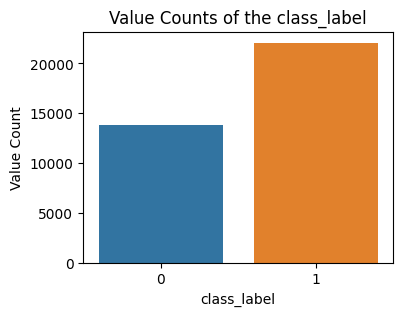

   class_label  Value Count
0            1        22088
1            0        13822


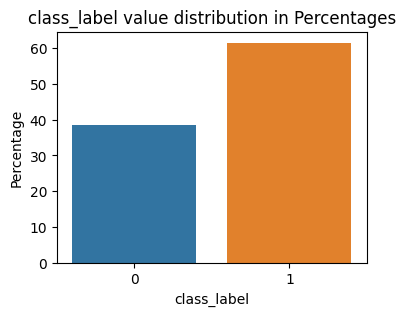

   class_label  counts  Percentage
0            1   22088    61.50933
1            0   13822    38.49067


In [35]:
# Display value counts for class
feature = "class_label"

# Get value counts for each unique value present in the attack column
feature_value_counts = train_df[feature].value_counts()

#Convert the series into Dataframe object
feature_value_counts = pd.DataFrame({feature:feature_value_counts.index,
                                     'Value Count':feature_value_counts.values})

# Plot the value counts
plt.figure(figsize = (4,3))
s = sns.barplot(x = feature, y="Value Count",data=feature_value_counts)
s.set_xticklabels(s.get_xticklabels())
s.set_title("Value Counts of the "+feature)
plt.show()
print(feature_value_counts)

# Get value counts for each unique value present in the attack column
feature_percentages = train_df[feature].value_counts().reset_index(name ="counts")

# Replace index name with attack
feature_percentages.rename(columns = {'index':feature}, inplace = True)

# Compute the percentage value
feature_percentages["Percentage"] = feature_percentages["counts"].apply(
    lambda x:round(x*100/feature_percentages["counts"].sum(),5))

# Plot the percentage values
plt.figure(figsize = (4,3))
s = sns.barplot(x = feature, y="Percentage",data=feature_percentages)
s.set_title(feature+" value distribution in Percentages")
s.set_xticklabels(s.get_xticklabels())
plt.show()
print(feature_percentages)

<Axes: >

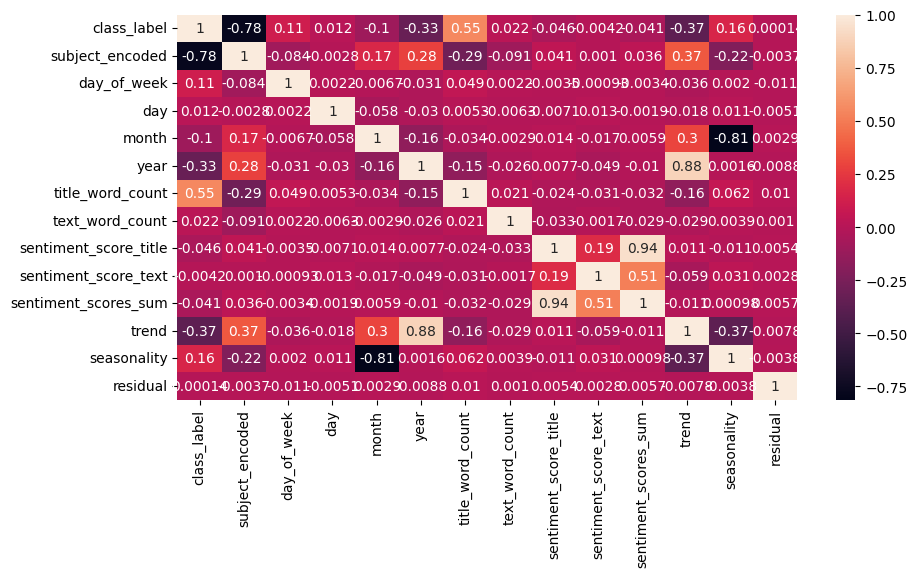

In [36]:
# Plot the feature correlations
plt.figure(figsize = (10,5))
sns.heatmap(train_df.corr(), annot = True)

In [37]:
# Identify the strongest feature correlations
corr = train_df.corr()
corr_class_label = corr.reindex(corr["class_label"].abs().sort_values(ascending=False).index)
corr_class_label = corr_class_label["class_label"]
corr_class_label = pd.DataFrame (corr_class_label)
corr_class_label=(corr_class_label.style.background_gradient(cmap ='Blues'))
corr_class_label

,class_label
class_label,1.000000
subject_encoded,-0.777750
title_word_count,0.551413
trend,-0.370250
year,-0.328454
seasonality,0.164274
day_of_week,0.108593
month,-0.102236
sentiment_score_title,-0.045605
sentiment_scores_sum,-0.041333


In [38]:
# Visualization
# Function to analyze the numerical features in the dataset
def plot_numerical_features(feature,data=train_df):
  print("Data Analysis of feature: {}".format(feature))
  # Histogram
  plt.figure(figsize=(3,3))
  plt.hist(train_df[feature], bins=25)
  plt.ylabel("Frequency")
  plt.title("Histogram plot for {}".format(feature))
  plt.show()

  #Plot value counts of all the records present in the data
  plt.figure(figsize=(3,3))
  s = sns.FacetGrid(data, hue="class_label").map(sns.distplot, feature).add_legend();
  s.fig.suptitle("Univariate analysis of the feature {}".format(feature))
  plt.show()
  print("Box Plots to analyze the {} distribution".format(feature))

  # Plot the box plot for the data distribution of the feature
  plt.figure(figsize=(3,3))
  s = sns.boxplot(x='class_label',y=feature, data=data)
  s.set_title("Box Plot for the feature "+feature)
  plt.show()

  # Print the min, max, 25th, 50th , 75th etc., statistical value for all the records
  print(data[feature].describe())
  print("="*100)

Analysis of subject_encoded
Data Analysis of feature: subject_encoded


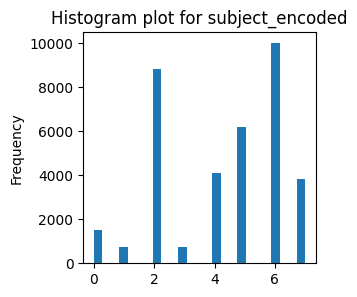

<Figure size 300x300 with 0 Axes>

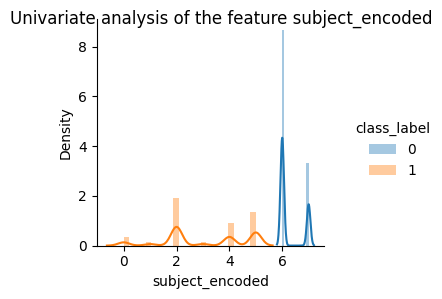

Box Plots to analyze the subject_encoded distribution


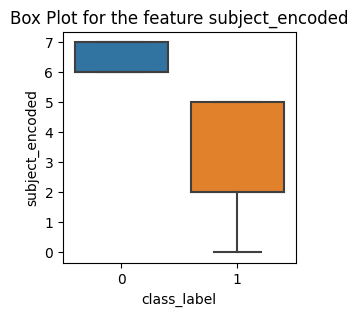

count    35910.000000
mean         4.306516
std          2.004098
min          0.000000
25%          2.000000
50%          5.000000
75%          6.000000
max          7.000000
Name: subject_encoded, dtype: float64
Analysis of title_word_count
Data Analysis of feature: title_word_count


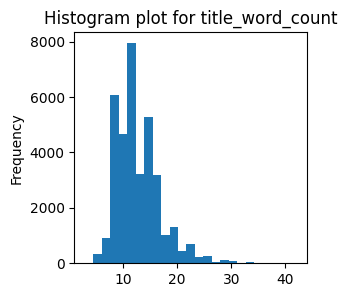

<Figure size 300x300 with 0 Axes>

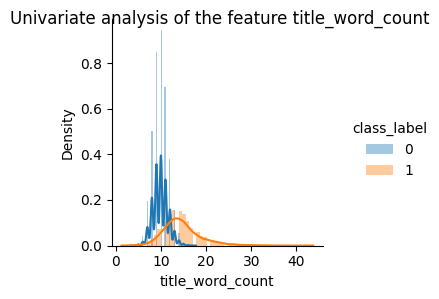

Box Plots to analyze the title_word_count distribution


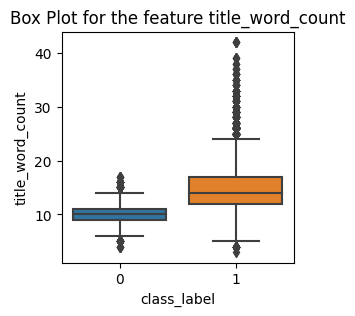

count    35910.000000
mean        12.810220
std          4.175551
min          3.000000
25%         10.000000
50%         12.000000
75%         15.000000
max         42.000000
Name: title_word_count, dtype: float64
Analysis of day
Data Analysis of feature: day


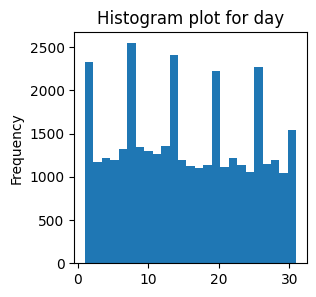

<Figure size 300x300 with 0 Axes>

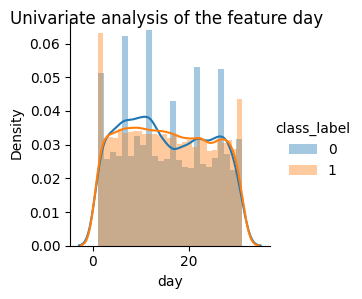

Box Plots to analyze the day distribution


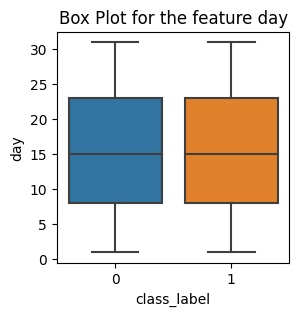

count    35910.000000
mean        15.357171
std          8.724521
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         31.000000
Name: day, dtype: float64
Analysis of trend
Data Analysis of feature: trend


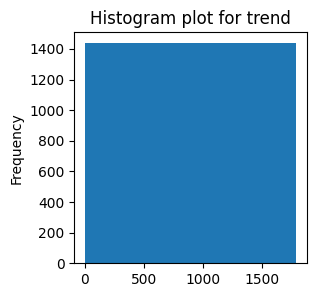

<Figure size 300x300 with 0 Axes>

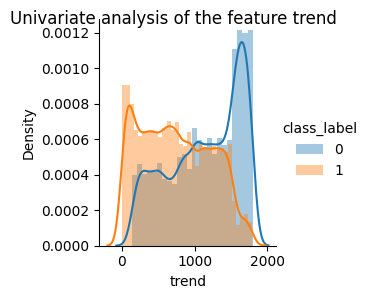

Box Plots to analyze the trend distribution


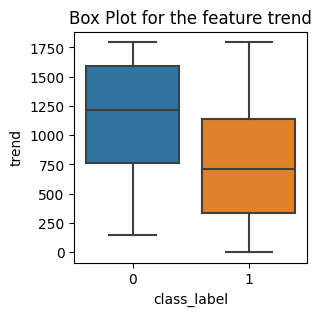

count    35910.000000
mean       897.725000
std        518.323421
min          0.000000
25%        448.862500
50%        897.725000
75%       1346.587500
max       1795.450000
Name: trend, dtype: float64
Analysis of residual
Data Analysis of feature: residual


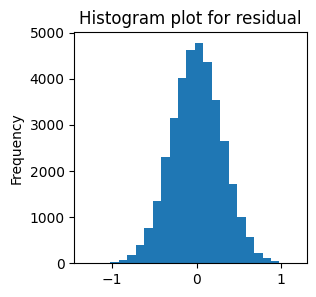

<Figure size 300x300 with 0 Axes>

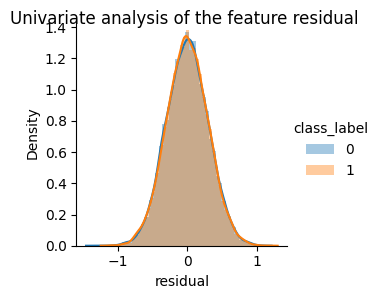

Box Plots to analyze the residual distribution


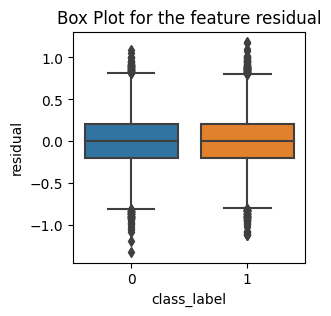

count    35910.000000
mean         0.002147
std          0.299743
min         -1.322917
25%         -0.200725
50%          0.001526
75%          0.203773
max          1.183596
Name: residual, dtype: float64
Analysis of seasonality
Data Analysis of feature: seasonality


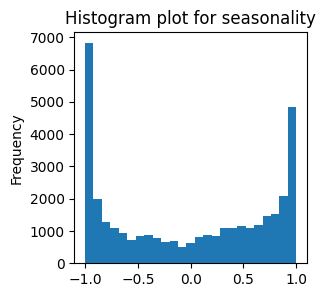

<Figure size 300x300 with 0 Axes>

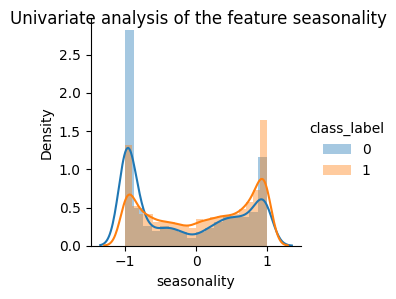

Box Plots to analyze the seasonality distribution


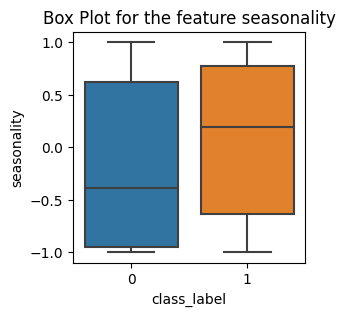

count    35910.000000
mean        -0.016273
std          0.745357
min         -0.999991
25%         -0.826354
50%          0.051620
75%          0.729558
max          0.999991
Name: seasonality, dtype: float64
Analysis of year
Data Analysis of feature: year


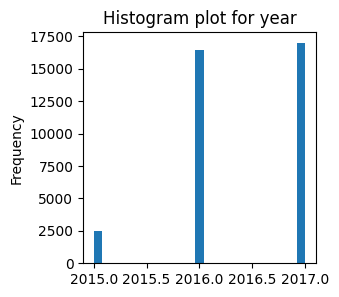

<Figure size 300x300 with 0 Axes>

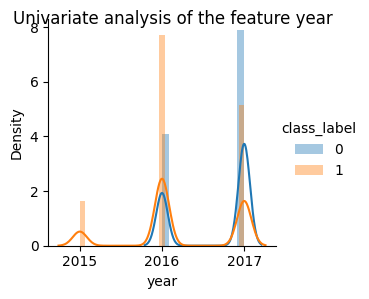

Box Plots to analyze the year distribution


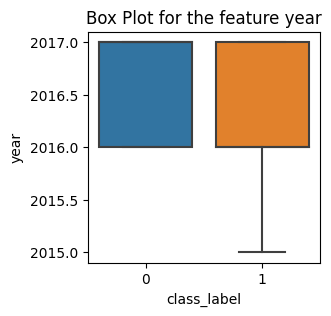

count    35910.000000
mean      2016.403286
std          0.615406
min       2015.000000
25%       2016.000000
50%       2016.000000
75%       2017.000000
max       2017.000000
Name: year, dtype: float64
Analysis of month
Data Analysis of feature: month


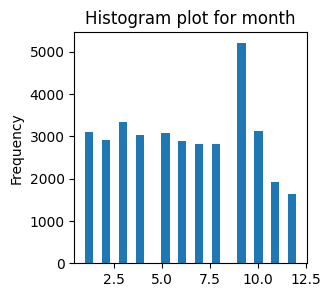

<Figure size 300x300 with 0 Axes>

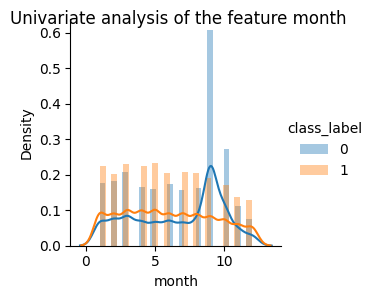

Box Plots to analyze the month distribution


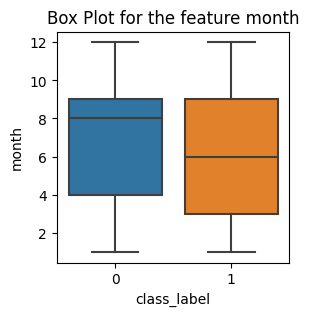

count    35910.000000
mean         6.268198
std          3.273748
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: month, dtype: float64
Analysis of day_of_week
Data Analysis of feature: day_of_week


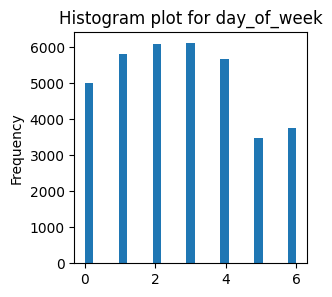

<Figure size 300x300 with 0 Axes>

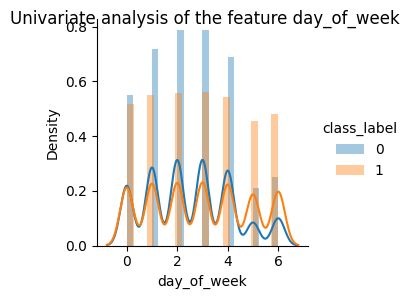

Box Plots to analyze the day_of_week distribution


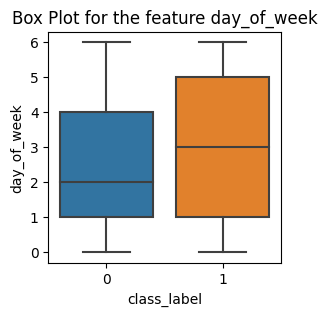

count    35910.000000
mean         2.754832
std          1.871127
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_week, dtype: float64
Analysis of text_word_count
Data Analysis of feature: text_word_count


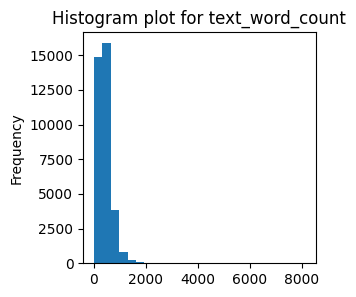

<Figure size 300x300 with 0 Axes>

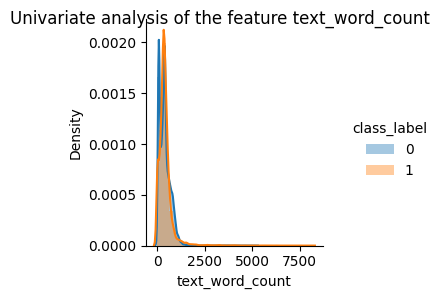

Box Plots to analyze the text_word_count distribution


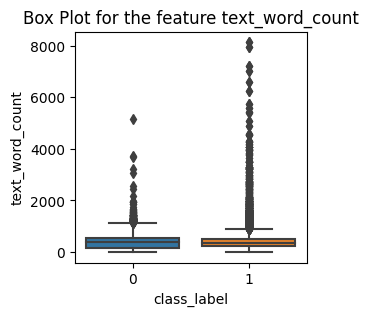

count    35910.000000
mean       409.630799
std        361.252965
min          0.000000
25%        211.000000
50%        365.000000
75%        514.000000
max       8135.000000
Name: text_word_count, dtype: float64
Analysis of sentiment_score_title
Data Analysis of feature: sentiment_score_title


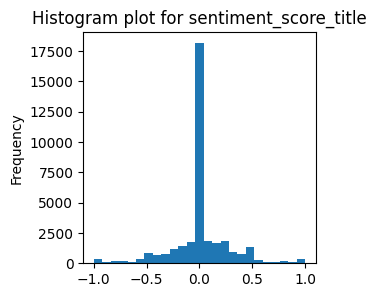

<Figure size 300x300 with 0 Axes>

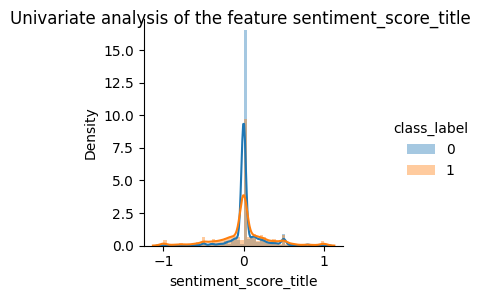

Box Plots to analyze the sentiment_score_title distribution


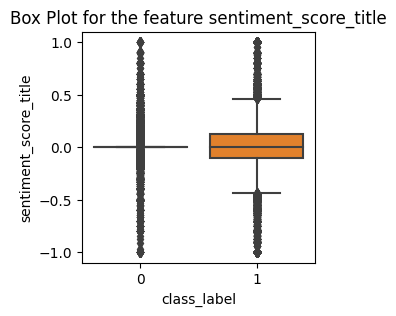

count    35910.000000
mean         0.012243
std          0.280177
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.068182
max          1.000000
Name: sentiment_score_title, dtype: float64
Analysis of sentiment_score_text
Data Analysis of feature: sentiment_score_text


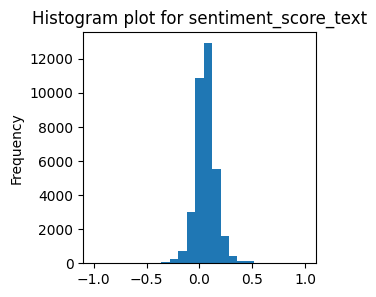

<Figure size 300x300 with 0 Axes>

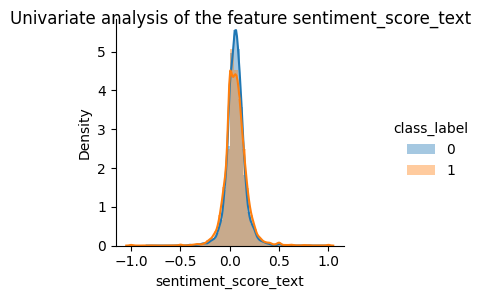

Box Plots to analyze the sentiment_score_text distribution


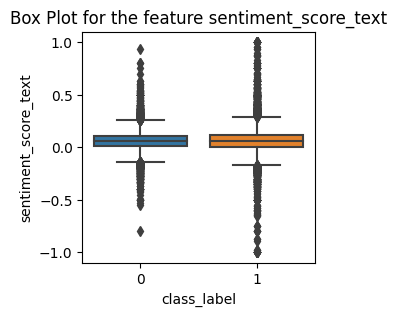

count    35910.000000
mean         0.059917
std          0.110337
min         -1.000000
25%          0.000000
50%          0.056613
75%          0.112403
max          1.000000
Name: sentiment_score_text, dtype: float64
Analysis of sentiment_scores_sum
Data Analysis of feature: sentiment_scores_sum


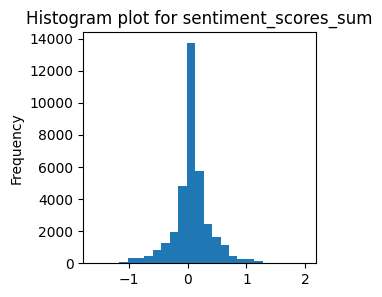

<Figure size 300x300 with 0 Axes>

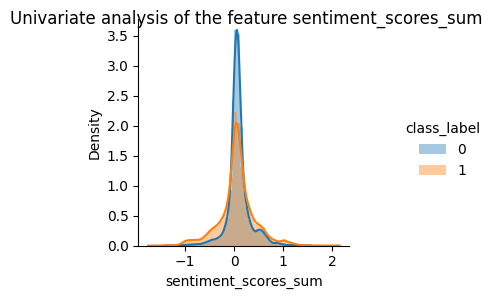

Box Plots to analyze the sentiment_scores_sum distribution


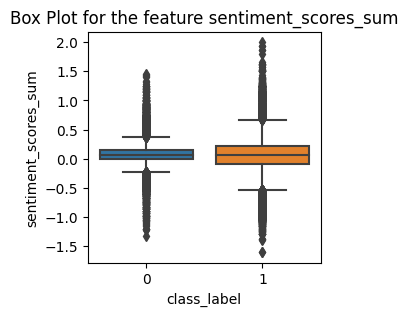

count    35910.000000
mean         0.072160
std          0.320289
min         -1.601562
25%         -0.035752
50%          0.064394
75%          0.187500
max          2.000000
Name: sentiment_scores_sum, dtype: float64


In [39]:
# Loop through all features
cols = ["subject_encoded", "title_word_count", "day", "trend", "residual", "seasonality", "year", "month", "day_of_week", "text_word_count", "sentiment_score_title", "sentiment_score_text", "sentiment_scores_sum"]
for col in cols:
    print("Analysis of {}".format(col))
    plot_numerical_features(col)

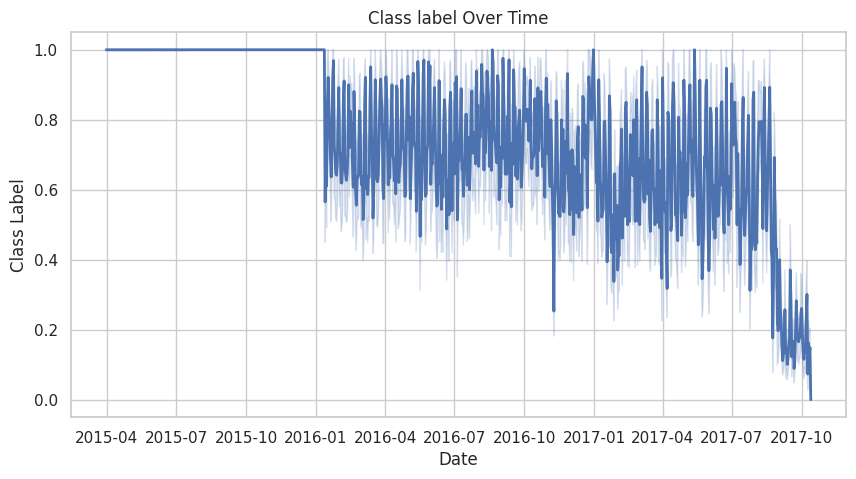

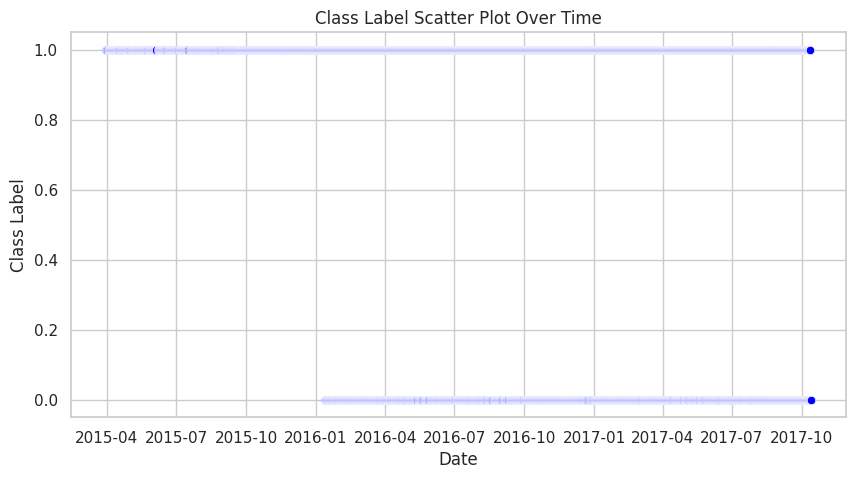

In [40]:
#!pip install matplotlib seaborn pandas
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for visualization with time
# Set the plot style
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='class_label', data=train_df, linewidth=2)
plt.xlabel('Date')
plt.ylabel('Class Label')
plt.title('Class label Over Time')
plt.show()

# Create a scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='date', y='class_label', data=train_df, color='blue')
plt.xlabel('Date')
plt.ylabel('Class Label')
plt.title('Class Label Scatter Plot Over Time')
plt.show()

In [41]:
train_df

,title,text,date,class_label,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,trend,seasonality,residual
37304,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,5,1,31,3,2015,15,123,0.10,0.214286,0.314286,0.00,0.999769,0.117768
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,2015-03-31,1,5,1,31,3,2015,20,493,0.25,0.102236,0.352236,0.05,0.999769,0.125316
37307,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,5,1,31,3,2015,12,322,0.50,0.200397,0.700397,0.10,0.999769,0.182128
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,4,1,31,3,2015,12,322,0.50,0.200397,0.700397,0.15,0.999769,-0.012430
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,4,1,31,3,2015,15,123,0.10,0.214286,0.314286,0.20,0.999769,-0.598981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560,"U.N. condemns anti-gay crackdowns in Egypt, Az...","GENEVA (Reuters) - Azerbaijan, Egypt and Indon...",2017-10-13,0,7,4,13,10,2017,8,360,0.00,0.076488,0.076488,1795.25,-0.977848,0.234590
17559,Kurd forces move back defense line around Kirk...,"KIRKUK, Iraq (Reuters) - Kurdish forces have m...",2017-10-13,0,7,4,13,10,2017,11,124,0.00,0.200000,0.200000,1795.30,-0.977848,-0.236406
17558,Kenya's Odinga says October poll would be illegal,LONDON (Reuters) - Kenya s opposition leader R...,2017-10-13,0,7,4,13,10,2017,8,603,-0.50,0.156456,-0.343544,1795.35,-0.977848,-0.327253
17557,Israel buoyed by Trump tack against Iran atom ...,JERUSALEM (Reuters) - Israel was upbeat about ...,2017-10-13,0,7,4,13,10,2017,15,703,-0.05,-0.021411,-0.071411,1795.40,-0.977848,0.432131


## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of columns to scale
columns_to_scale = ['subject_encoded', 'title_word_count', 'trend', 'residual', 'seasonality', 'day', 'year', 'month', 'day_of_week', 'text_word_count', 'sentiment_score_title', 'sentiment_score_text', 'sentiment_scores_sum']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the selected columns
train_df[columns_to_scale] = scaler.fit_transform(train_df[columns_to_scale])
x_test[columns_to_scale] = scaler.fit_transform(x_test[columns_to_scale])
train_df

In [44]:
# Drop the text and title columns
train_df = train_df.drop(['title', 'text', 'date'], axis = 1)
x_test = x_test.drop(['title', 'text', 'date'], axis = 1)

#Splitting the target labels and features in train_df
x_train = train_df.drop(['class_label'], axis = 1) # Dropping target label from features set
y_train = train_df['class_label'] # Target label

x_val,x_train,y_val,y_train = train_test_split(x_train,y_train, test_size=0.8, shuffle=False)
y_val = pd.DataFrame(y_val)
y_train = pd.DataFrame(y_train)
print("y_train:\n", y_train.value_counts())
print("y_val:\n", y_val.value_counts())

y_train:
 class_label
1              16162
0              12566
dtype: int64
y_val:
 class_label
1              5926
0              1256
dtype: int64


In [46]:
x_train

,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,trend,seasonality,residual
28442,-1.150916,0.665474,-0.843287,-0.692854,-0.655326,0.524436,-0.469569,-0.043699,0.997717,0.305479,-1.039182,1.351567,0.161088
28441,-1.150916,0.665474,-0.843287,-0.692854,-0.655326,0.045451,-0.358842,-0.961499,-1.896422,-1.494385,-1.039086,1.351567,-0.467433
28440,-1.150916,0.665474,-0.843287,-0.692854,-0.655326,0.045451,0.305522,-0.043699,0.024606,-0.029750,-1.038989,1.351567,0.575591
28439,-1.150916,0.665474,-0.843287,-0.692854,-0.655326,0.763929,0.488222,-0.281647,-0.377891,-0.376555,-1.038893,1.351567,0.498930
10017,0.845022,0.665474,-0.843287,-0.692854,-0.655326,-1.152012,-0.140155,-0.043699,1.551286,0.496178,-1.038796,1.351567,0.974009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560,1.344007,0.665474,-0.270181,1.139933,0.969640,-1.152012,-0.137387,-0.043699,0.150191,0.013513,1.731617,-1.290105,0.775483
17559,1.344007,0.665474,-0.270181,1.139933,0.969640,-0.433534,-0.790678,-0.043699,1.269616,0.399145,1.731713,-1.290105,-0.795872
17558,1.344007,0.665474,-0.270181,1.139933,0.969640,-1.152012,0.535281,-1.828310,0.874967,-1.297920,1.731810,-1.290105,-1.098955
17557,1.344007,0.665474,-0.270181,1.139933,0.969640,0.524436,0.812099,-0.222160,-0.737097,-0.448261,1.731906,-1.290105,1.434526


In [47]:
y_train

,class_label
28442,1
28441,1
28440,1
28439,1
10017,0
...,...
17560,0
17559,0
17558,0
17557,0


In [48]:
x_val

,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,trend,seasonality,residual
37304,0.346038,-0.937861,1.792998,-0.998319,-2.280293,0.524436,-0.793446,0.313223,1.399091,0.755971,-1.732003,1.363178,0.385738
37306,0.346038,-0.937861,1.792998,-0.998319,-2.280293,1.721900,0.230781,0.848606,0.383550,0.874460,-1.731906,1.363178,0.410919
37307,0.346038,-0.937861,1.792998,-0.998319,-2.280293,-0.194042,-0.242578,1.740912,1.273212,1.961497,-1.731810,1.363178,0.600455
43336,-0.152947,-0.937861,1.792998,-0.998319,-2.280293,-0.194042,-0.242578,1.740912,1.273212,1.961497,-1.731713,1.363178,-0.048633
43335,-0.152947,-0.937861,1.792998,-0.998319,-2.280293,0.524436,-0.793446,0.313223,1.399091,0.755971,-1.731617,1.363178,-2.005505
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28447,-1.150916,0.665474,-0.843287,-0.692854,-0.655326,-0.912520,-0.328392,-0.241989,-0.532173,-0.395012,-1.039665,1.351567,-0.901795
28446,-1.150916,0.665474,-0.843287,-0.692854,-0.655326,0.763929,-0.439119,-0.238384,0.669974,0.022271,-1.039568,1.351567,0.136605
28445,-1.150916,0.665474,-0.843287,-0.692854,-0.655326,-0.194042,-0.118010,1.241221,-0.511491,0.909571,-1.039472,1.351567,-0.653679
28444,-1.150916,0.665474,-0.843287,-0.692854,-0.655326,-0.433534,-0.270260,-0.871109,0.261323,-0.671991,-1.039375,1.351567,-0.256699


In [49]:
y_val

,class_label
37304,1
37306,1
37307,1
43336,1
43335,1
...,...
28447,1
28446,1
28445,1
28444,1


In [50]:
x_test

,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,trend,seasonality,residual
17555,0.499424,0.783539,-0.410496,-1.087261,-0.062559,-0.585194,-0.043369,-0.090623,0.229042,0.007754,-1.731858,-1.267376,-0.509043
17554,0.499424,0.783539,-0.410496,-1.087261,-0.062559,0.562628,-0.365379,0.620143,0.072867,0.553678,-1.731472,-1.267376,0.243483
17553,0.499424,0.783539,-0.410496,-1.087261,-0.062559,0.275673,1.547162,0.216920,-0.286776,0.078160,-1.731086,-1.267376,-0.322491
17552,0.499424,0.783539,-0.410496,-1.087261,-0.062559,0.275673,-0.745936,-0.090623,-0.617590,-0.305426,-1.730700,-1.267376,-1.066135
17551,0.499424,0.783539,-0.410496,-1.087261,-0.062559,-0.872149,0.063967,-0.090623,-1.234817,-0.533747,-1.730315,-1.267376,1.045869
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30470,-1.097666,1.896172,0.184408,-9.485089,15.984814,3.432183,-0.667873,-0.172635,0.831977,0.161131,1.730315,4.837097,0.374988
30475,-1.097666,1.896172,0.184408,-9.485089,15.984814,1.423495,-0.023854,-1.320796,2.146378,-0.327854,1.730700,4.837097,-0.635333
30469,-1.097666,-1.441725,0.303389,-9.485089,15.984814,-0.011283,-0.817493,-0.090623,1.444814,0.457485,1.731086,4.877209,1.164304
30468,-1.097666,-1.441725,0.303389,-9.485089,15.984814,0.562628,-0.547526,-0.090623,-1.770968,-0.732076,1.731472,4.877209,1.240812


In [51]:
y_test

,class_label
17555,0
17554,0
17553,0
17552,0
17551,0
...,...
30470,1
30475,1
30469,1
30468,1


##Preprocessing for GloVe


In [ ]:
from tkinter.constants import Y
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load stopwords and initialize tokenizer
stop_words = set(stopwords.words("english"))
tokenizer = RegexpTokenizer(r'\w+')

# Prepare text data for GloVe embedding
train = []
for par in train_df["text"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    train.append(tmp)
# In the code above, the text data is processed within the same loop that constructs the list X. After this data cleaning step, you can proceed to use the X list to create word embeddings using the GloVe pre-trained model or train your own embeddings if you have a sufficiently large and domain-specific dataset.

# Make sure that the preprocessing steps are consistent when training your own word embeddings or using pre-trained models like GloVe. Consistency ensures that words in your dataset are represented in a similar way to the words in the GloVe vocabulary, enabling meaningful embeddings to be generated.

test = []
for par in x_test["text"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    test.append(tmp)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##GloVe

In [ ]:
import spacy
from spacy.vectors import Vectors

# uploaded the file with 100-dimensional word vectors
uploaded_file_path = 'glove.6B.100d.txt'  # Provide the correct file path

# Load word vectors into a dictionary using 'latin-1' encoding, skipping invalid lines
word_vectors = {}
with open(uploaded_file_path, 'r', encoding='latin-1') as file:
    for line in file:
        try:
            values = line.strip().split()
            word = values[0]
            vector = [float(val) for val in values[1:]]
            word_vectors[word] = vector
        except (ValueError, IndexError):
            # Skip lines that cannot be converted to floats or don't have enough values
            continue

# Now, word_vectors dictionary contains words as keys and their corresponding 100-dimensional vectors as values

In [ ]:
# Create word embeddings for processed text data using loaded GloVe word vectors
word_embeddings = []
for sentence in train:
    sentence_embeddings = []
    for word in sentence:
        # Check if the word is in the word_vectors dictionary
        if word in word_vectors:
            # Get the word vector from the loaded GloVe word vectors
            word_vector = word_vectors[word]
            sentence_embeddings.append(word_vector)
    # If sentence_embeddings is not empty, calculate the average vector for the sentence
    if sentence_embeddings:
        average_vector = np.mean(sentence_embeddings, axis=0)
        word_embeddings.append(average_vector)
    else:
        # If the sentence doesn't contain any words from the word_vectors dictionary, consider it as all zeros vector
        word_embeddings.append(np.zeros(100))  # Assuming 100-dimensional word vectors

# Convert word_embeddings to numpy array for further processing
word_embeddings_array = np.array(word_embeddings)
print("Word embeddings shape:", word_embeddings_array.shape)

Word embeddings shape: (35910, 100)


In [ ]:
# Create word embeddings for processed text data using loaded GloVe word vectors
word_embeddings_test = []
for sentence in test:
    sentence_embeddings_test = []
    for word in sentence:
        # Check if the word is in the word_vectors dictionary
        if word in word_vectors:
            # Get the word vector from the loaded GloVe word vectors
            word_vector = word_vectors[word]
            sentence_embeddings_test.append(word_vector)
    # If sentence_embeddings is not empty, calculate the average vector for the sentence
    if sentence_embeddings_test:
        average_vector_test = np.mean(sentence_embeddings_test, axis=0)
        word_embeddings_test.append(average_vector_test)
    else:
        # If the sentence doesn't contain any words from the word_vectors dictionary, consider it as all zeros vector
        word_embeddings_test.append(np.zeros(100))  # Assuming 100-dimensional word vectors

# Convert word_embeddings to numpy array for further processing
word_embeddings_array_test = np.array(word_embeddings_test)
print("Word embeddings shape:", word_embeddings_array_test.shape)

Word embeddings shape: (8978, 100)


In [ ]:
# Create a new dataframe for word embeddings
train_embeddings_df = pd.DataFrame(word_embeddings_array, columns=[f"embedding_{i}" for i in range(word_embeddings_array.shape[1])])
test_embeddings_df = pd.DataFrame(word_embeddings_array_test, columns=[f"embedding_{i}" for i in range(word_embeddings_array_test.shape[1])])

# Drop the text and title columns
train_df = train_df.drop(['title', 'text', 'date'], axis = 1)
x_test = x_test.drop(['title', 'text', 'date'], axis = 1)

In [ ]:
train_df

,class_label,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,trend,seasonality,residual
37304,1,0.346038,-0.937861,1.792998,-0.998319,-2.280293,0.524436,-0.793446,0.313223,1.399091,0.755971,-1.732003,1.363178,-0.448785
37306,1,0.346038,-0.937861,1.792998,-0.998319,-2.280293,1.721900,0.230781,0.848606,0.383550,0.874460,-1.731906,1.363178,-0.659630
37307,1,0.346038,-0.937861,1.792998,-0.998319,-2.280293,-0.194042,-0.242578,1.740912,1.273212,1.961497,-1.731810,1.363178,-0.803666
43336,1,-0.152947,-0.937861,1.792998,-0.998319,-2.280293,-0.194042,-0.242578,1.740912,1.273212,1.961497,-1.731713,1.363178,0.434029
43335,1,-0.152947,-0.937861,1.792998,-0.998319,-2.280293,0.524436,-0.793446,0.313223,1.399091,0.755971,-1.731617,1.363178,-0.484648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560,0,1.344007,0.665474,-0.270181,1.139933,0.969640,-1.152012,-0.137387,-0.043699,0.150191,0.013513,1.731617,-1.290105,-0.797976
17559,0,1.344007,0.665474,-0.270181,1.139933,0.969640,-0.433534,-0.790678,-0.043699,1.269616,0.399145,1.731713,-1.290105,-0.369040
17558,0,1.344007,0.665474,-0.270181,1.139933,0.969640,-1.152012,0.535281,-1.828310,0.874967,-1.297920,1.731810,-1.290105,-0.164227
17557,0,1.344007,0.665474,-0.270181,1.139933,0.969640,0.524436,0.812099,-0.222160,-0.737097,-0.448261,1.731906,-1.290105,0.151031


In [ ]:
# Concatenate word embeddings with the original dataframe
train_df.reset_index(drop=True, inplace=True)
train_embeddings_df.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
test_embeddings_df.reset_index(drop=True, inplace=True)

train_df = pd.concat([train_df, train_embeddings_df], axis=1)
x_test = pd.concat([x_test, test_embeddings_df], axis=1)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35910 entries, 0 to 35909
Columns: 114 entries, class_label to embedding_99
dtypes: float64(113), int64(1)
memory usage: 31.2 MB


In [ ]:
train_df

,class_label,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,...,embedding_90,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99
0,1,0.346038,-0.937861,1.792998,-0.998319,-2.280293,0.524436,-0.793446,0.313223,1.399091,...,0.087951,-0.137604,0.042670,0.141208,-0.401792,0.064461,0.070735,0.114941,0.241007,0.039567
1,1,0.346038,-0.937861,1.792998,-0.998319,-2.280293,1.721900,0.230781,0.848606,0.383550,...,0.052983,-0.113025,-0.067991,0.096134,-0.136682,0.094850,-0.042049,-0.116536,0.281204,0.058128
2,1,0.346038,-0.937861,1.792998,-0.998319,-2.280293,-0.194042,-0.242578,1.740912,1.273212,...,0.015858,-0.039120,-0.035783,0.214779,-0.309864,0.023368,-0.048158,-0.039133,0.284645,0.142011
3,1,-0.152947,-0.937861,1.792998,-0.998319,-2.280293,-0.194042,-0.242578,1.740912,1.273212,...,0.015858,-0.039120,-0.035783,0.214779,-0.309864,0.023368,-0.048158,-0.039133,0.284645,0.142011
4,1,-0.152947,-0.937861,1.792998,-0.998319,-2.280293,0.524436,-0.793446,0.313223,1.399091,...,0.087951,-0.137604,0.042670,0.141208,-0.401792,0.064461,0.070735,0.114941,0.241007,0.039567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35905,0,1.344007,0.665474,-0.270181,1.139933,0.969640,-1.152012,-0.137387,-0.043699,0.150191,...,0.054297,-0.231840,-0.078120,-0.066411,-0.178049,0.139873,-0.282420,-0.124062,0.326154,0.006874
35906,0,1.344007,0.665474,-0.270181,1.139933,0.969640,-0.433534,-0.790678,-0.043699,1.269616,...,0.163724,-0.121396,-0.361312,0.130073,-0.774846,0.282803,-0.072129,-0.006508,0.424875,0.161754
35907,0,1.344007,0.665474,-0.270181,1.139933,0.969640,-1.152012,0.535281,-1.828310,0.874967,...,0.175371,-0.214155,-0.347734,0.266334,-0.460900,0.218992,0.020910,0.025411,0.343654,0.174930
35908,0,1.344007,0.665474,-0.270181,1.139933,0.969640,0.524436,0.812099,-0.222160,-0.737097,...,-0.099576,-0.080946,-0.258989,0.022053,-0.476059,0.199283,-0.003149,-0.019942,0.451417,0.176014


In [ ]:
#Splitting the target labels and features in train_df
x_train = train_df.drop(['class_label'], axis = 1) # Dropping target label from features set
y_train = train_df['class_label'] # Target label
x_train

,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,...,embedding_90,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99
0,0.346038,-0.937861,1.792998,-0.998319,-2.280293,0.524436,-0.793446,0.313223,1.399091,0.755971,...,0.087951,-0.137604,0.042670,0.141208,-0.401792,0.064461,0.070735,0.114941,0.241007,0.039567
1,0.346038,-0.937861,1.792998,-0.998319,-2.280293,1.721900,0.230781,0.848606,0.383550,0.874460,...,0.052983,-0.113025,-0.067991,0.096134,-0.136682,0.094850,-0.042049,-0.116536,0.281204,0.058128
2,0.346038,-0.937861,1.792998,-0.998319,-2.280293,-0.194042,-0.242578,1.740912,1.273212,1.961497,...,0.015858,-0.039120,-0.035783,0.214779,-0.309864,0.023368,-0.048158,-0.039133,0.284645,0.142011
3,-0.152947,-0.937861,1.792998,-0.998319,-2.280293,-0.194042,-0.242578,1.740912,1.273212,1.961497,...,0.015858,-0.039120,-0.035783,0.214779,-0.309864,0.023368,-0.048158,-0.039133,0.284645,0.142011
4,-0.152947,-0.937861,1.792998,-0.998319,-2.280293,0.524436,-0.793446,0.313223,1.399091,0.755971,...,0.087951,-0.137604,0.042670,0.141208,-0.401792,0.064461,0.070735,0.114941,0.241007,0.039567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35905,1.344007,0.665474,-0.270181,1.139933,0.969640,-1.152012,-0.137387,-0.043699,0.150191,0.013513,...,0.054297,-0.231840,-0.078120,-0.066411,-0.178049,0.139873,-0.282420,-0.124062,0.326154,0.006874
35906,1.344007,0.665474,-0.270181,1.139933,0.969640,-0.433534,-0.790678,-0.043699,1.269616,0.399145,...,0.163724,-0.121396,-0.361312,0.130073,-0.774846,0.282803,-0.072129,-0.006508,0.424875,0.161754
35907,1.344007,0.665474,-0.270181,1.139933,0.969640,-1.152012,0.535281,-1.828310,0.874967,-1.297920,...,0.175371,-0.214155,-0.347734,0.266334,-0.460900,0.218992,0.020910,0.025411,0.343654,0.174930
35908,1.344007,0.665474,-0.270181,1.139933,0.969640,0.524436,0.812099,-0.222160,-0.737097,-0.448261,...,-0.099576,-0.080946,-0.258989,0.022053,-0.476059,0.199283,-0.003149,-0.019942,0.451417,0.176014


In [ ]:
y_train

0        1
1        1
2        1
3        1
4        1
        ..
35905    0
35906    0
35907    0
35908    0
35909    0
Name: class_label, Length: 35910, dtype: int64

In [ ]:
x_test

,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,...,embedding_90,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99
0,0.499424,0.783539,-0.410496,-1.087261,-0.062559,-0.585194,-0.043369,-0.090623,0.229042,0.007754,...,0.134920,-0.306705,-0.014279,0.181421,-0.222934,0.159305,-0.078970,-0.072227,0.257830,0.051494
1,0.499424,0.783539,-0.410496,-1.087261,-0.062559,0.562628,-0.365379,0.620143,0.072867,0.553678,...,-0.086120,-0.095865,-0.199669,0.022953,-0.422975,0.241851,-0.118349,-0.214024,0.461344,0.160736
2,0.499424,0.783539,-0.410496,-1.087261,-0.062559,0.275673,1.547162,0.216920,-0.286776,0.078160,...,-0.133639,-0.068145,-0.227550,0.022526,-0.390666,0.208118,-0.078900,-0.117197,0.447067,0.118356
3,0.499424,0.783539,-0.410496,-1.087261,-0.062559,0.275673,-0.745936,-0.090623,-0.617590,-0.305426,...,0.101255,-0.100673,-0.305279,0.090422,-0.412307,0.303130,-0.027801,-0.012028,0.408644,-0.009282
4,0.499424,0.783539,-0.410496,-1.087261,-0.062559,-0.872149,0.063967,-0.090623,-1.234817,-0.533747,...,0.051140,-0.252186,-0.264002,0.062130,-0.379365,0.073193,-0.097604,-0.174746,0.354600,-0.007325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8973,-1.097666,1.896172,0.184408,-9.485089,15.984814,3.432183,-0.667873,-0.172635,0.831977,0.161131,...,0.171283,-0.087912,-0.047807,0.054579,-0.340073,0.121126,-0.245432,-0.136692,0.206365,0.106531
8974,-1.097666,1.896172,0.184408,-9.485089,15.984814,1.423495,-0.023854,-1.320796,2.146378,-0.327854,...,-0.068775,-0.129232,0.065629,0.160979,-0.448780,0.065338,-0.124272,-0.016895,0.418530,0.048201
8975,-1.097666,-1.441725,0.303389,-9.485089,15.984814,-0.011283,-0.817493,-0.090623,1.444814,0.457485,...,0.126667,-0.224657,-0.079092,-0.067796,-0.427678,-0.032715,-0.086453,-0.105322,0.241099,0.241389
8976,-1.097666,-1.441725,0.303389,-9.485089,15.984814,0.562628,-0.547526,-0.090623,-1.770968,-0.732076,...,0.017193,-0.225021,-0.037748,0.081851,-0.374840,0.134867,-0.079366,-0.096097,0.374882,0.040087


In [ ]:
y_test

,class_label
17555,0
17554,0
17553,0
17552,0
17551,0
...,...
30470,1
30475,1
30469,1
30468,1


In [ ]:
# Scaling of word embeddings is not necessary while using pre-trained embeddings like GloVe vectors.

In [ ]:
x_val,x_train,y_val,y_train = train_test_split(x_train,y_train, test_size=0.8, shuffle=False)
y_val = pd.DataFrame(y_val)
y_train = pd.DataFrame(y_train)
print("y_train:\n", y_train.value_counts())
print("y_val:\n", y_val.value_counts())

y_train:
 0    9572
1    8815
dtype: int64
y_val:
 1    3213
0    1383
dtype: int64


In [ ]:
x_train

,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,...,embedding_90,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99
17523,-0.152947,-0.937861,1.563756,1.445398,-0.655326,0.524436,-0.284101,-0.043699,0.438814,0.112941,...,0.071324,-0.041522,-0.106381,0.167034,-0.366933,0.124412,0.153311,0.131167,0.489941,0.015611
17524,-0.152947,-0.937861,1.563756,1.445398,-0.655326,0.045451,-1.133933,-0.906261,-0.543043,-0.979838,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17525,-0.152947,-0.937861,1.563756,1.445398,-0.655326,-0.194042,0.078531,-0.043699,0.355930,0.084389,...,0.076278,0.022308,0.129194,-0.138635,-0.288774,-0.010066,-0.103130,-0.095689,0.534852,0.216841
17526,-0.152947,-0.937861,1.563756,1.445398,-0.655326,1.003422,-1.133933,-0.043699,-0.543043,-0.225300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17527,-0.152947,-0.937861,1.563756,1.445398,-0.655326,2.679870,-0.322855,-1.560618,-1.262651,-1.800144,...,0.078453,-0.027801,0.088642,-0.088331,-0.169675,0.008453,-0.118602,-0.257630,0.288281,0.001856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35905,1.344007,0.665474,-0.270181,1.139933,0.969640,-1.152012,-0.137387,-0.043699,0.150191,0.013513,...,0.054297,-0.231840,-0.078120,-0.066411,-0.178049,0.139873,-0.282420,-0.124062,0.326154,0.006874
35906,1.344007,0.665474,-0.270181,1.139933,0.969640,-0.433534,-0.790678,-0.043699,1.269616,0.399145,...,0.163724,-0.121396,-0.361312,0.130073,-0.774846,0.282803,-0.072129,-0.006508,0.424875,0.161754
35907,1.344007,0.665474,-0.270181,1.139933,0.969640,-1.152012,0.535281,-1.828310,0.874967,-1.297920,...,0.175371,-0.214155,-0.347734,0.266334,-0.460900,0.218992,0.020910,0.025411,0.343654,0.174930
35908,1.344007,0.665474,-0.270181,1.139933,0.969640,0.524436,0.812099,-0.222160,-0.737097,-0.448261,...,-0.099576,-0.080946,-0.258989,0.022053,-0.476059,0.199283,-0.003149,-0.019942,0.451417,0.176014


In [ ]:
x_val

,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,...,embedding_90,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99
12927,0.845022,-0.937861,0.876029,0.529004,-0.655326,-1.391505,-0.059878,-0.936004,-0.867937,-1.117779,...,0.034185,-0.147758,-0.055174,-0.098547,-0.514982,0.144535,-0.001306,-0.018684,0.613302,0.079351
12928,0.845022,-0.937861,0.876029,0.529004,-0.655326,-0.912520,-0.015587,-0.043699,-0.041764,-0.052614,...,0.063310,-0.050072,-0.130005,-0.021005,-0.429213,0.194257,0.234239,0.018704,0.424975,-0.172290
12929,0.845022,-0.937861,0.876029,0.529004,-0.655326,-0.433534,0.283377,-0.043699,0.923489,0.279908,...,0.048100,-0.246003,-0.201322,0.188415,-0.340037,0.208744,0.024876,0.014347,0.395868,-0.064437
12930,0.845022,-0.937861,0.876029,0.529004,-0.655326,-0.912520,-0.253651,-0.043699,0.235694,0.042968,...,0.047474,-0.067785,-0.074738,0.253308,-0.583550,0.181206,-0.043791,0.009421,0.362504,0.028098
12931,0.346038,-0.937861,0.876029,0.529004,-0.655326,1.003422,-0.743619,0.491684,-0.337059,0.313994,...,-0.068390,-0.147809,0.052131,-0.009540,-0.246130,-0.026279,-0.025084,-0.014635,0.225252,-0.023277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17518,0.346038,-0.937861,1.563756,1.445398,-0.655326,1.003422,-1.133933,-0.043699,-0.543043,-0.225300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17519,0.346038,-0.937861,1.563756,1.445398,-0.655326,2.679870,-0.322855,-1.560618,-1.262651,-1.800144,...,0.078453,-0.027801,0.088642,-0.088331,-0.169675,0.008453,-0.118602,-0.257630,0.288281,0.001856
17520,0.346038,-0.937861,1.563756,1.445398,-0.655326,1.242914,-0.920783,-0.043699,0.233811,0.042320,...,0.210174,-0.016923,0.102133,0.129973,-0.371173,0.137183,0.008625,-0.204195,0.300981,0.069809
17521,0.346038,-0.937861,1.563756,1.445398,-0.655326,-0.433534,-1.131164,-0.043699,-0.543043,-0.225300,...,-0.187260,1.121700,0.094288,0.165240,1.092500,-0.486210,0.523490,0.543470,-0.450880,0.210220


# Model training

In [52]:
!pip install scikit-optimize --q
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN

# Tabulate results
results_table = []

# Print metrics
def print_metrics(model, y_pred, classifier, model_history=None, all_charts=True):

  if model_history is not None:
    # create a figure with three subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # plot accuracy
    axs[0].plot(model_history['accuracy'])
    axs[0].plot(model_history['val_accuracy'])
    axs[0].set_title('Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train', 'Validate'], loc='upper left')

    # plot loss
    axs[1].plot(model_history['loss'])
    axs[1].plot(model_history['val_loss'])
    axs[1].set_title('Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train', 'Validate'], loc='upper right')

    # plot F1-score
    axs[2].plot(model_history['f1_m'])
    axs[2].plot(model_history['val_f1_m'])
    axs[2].set_title('F1-Score')
    axs[2].set_ylabel('F1')
    axs[2].set_xlabel('Epoch')
    axs[2].legend(['Train', 'Validate'], loc='upper left')

    # adjust the layout and spacing
    plt.tight_layout()

    # show the plot
    plt.show()

  # Create a figure with three subplots
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))

  # Plot confusion matrix in the first subplot
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', ax=axs[0])
  axs[0].set_xlabel('True label')
  axs[0].set_ylabel('Predicted label')
  axs[0].set_title('Confusion Matrix')

  # Plot Precision-Recall curve in the second subplot
  prCurve = PrecisionRecallDisplay.from_predictions(y_test, y_pred, ax=axs[1])
  _ = prCurve.ax_.set_title("Precision-Recall curve")

  # Plot ROC curve in the third subplot
  rocCurve = RocCurveDisplay.from_predictions(y_test, y_pred, ax=axs[2])
  _ = rocCurve.ax_.set_title("Receiver Operating Characteristic (ROC) curve")
  _ = axs[2].set_xlabel('False Positive Rate')
  _ = axs[2].set_ylabel('True Positive Rate')

  # Adjust the layout and spacing
  plt.tight_layout()

  # Show the plot
  plt.show()

  # Obtain f1-score, precision and Recall values to determine the performance of the model
  f1Score = f1_score(y_test, y_pred)
  precisionVal = precision_score(y_test, y_pred)
  recallVal = recall_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)

  print("{}".format(classifier))
  print("f1-score: {:.2f}%".format(f1Score*100))
  print("Precision: {:.2f}%".format(precisionVal*100))
  print("Recall: {:.2f}%".format(recallVal*100))
  print("Accuracy: {:.2f}%".format(acc*100))

  return[classifier, f1Score*100, precisionVal*100, recallVal*100, acc*100]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.5 MB/s eta 0:00:00


In [54]:
from sklearn.metrics import log_loss
from imblearn.over_sampling import ADASYN

# Reshape x_train to have three dimensions (samples, time_steps, features)
time_steps = 1  # You may adjust this based on your data and how it should be split into time steps
features = x_train.shape[1]  # Assuming x_train has multiple features

x_train_reshaped = np.reshape(x_train.values, (x_train.shape[0], time_steps, features))
x_test_reshaped = np.reshape(x_test.values, (x_test.shape[0], time_steps, features))
x_val_reshaped = np.reshape(x_val.values, (x_val.shape[0], time_steps, features))
y_train = np.array(y_train)  # Ensure y_train is a NumPy array

# Flatten x_train_reshaped to 2D array
x_train_flattened = x_train_reshaped.reshape((x_train_reshaped.shape[0], -1))
x_val_flattened = x_val_reshaped.reshape((x_val_reshaped.shape[0], -1))

# Create an ADASYN instance
adasyn = ADASYN(sampling_strategy='minority')  # You can adjust the sampling_strategy as needed

# Generate ADASYN samples
x_train_adasyn, y_train_adasyn = adasyn.fit_resample(x_train_flattened, y_train)
x_val_adasyn, y_val_adasyn = adasyn.fit_resample(x_val_flattened, y_val)

# Now, x_train_adasyn and y_train_adasyn contain the ADASYN-sampled data

# Run predictions
def finalPrediction(model, classifier, results_table, all_charts=True, reshape=False):

  # Fit on train data
  if (classifier == "LSTM" or classifier == "RNN"):
        model.fit(x_train_reshaped, y_train)
  else:
        # Ensure that x_train_adasyn has the correct shape
        x_train_adasyn_reshaped = np.reshape(x_train_adasyn, (x_train_adasyn.shape[0], 1, features))
        model.fit(x_train_adasyn_reshaped, y_train_adasyn)

   # Predict on test data
  y_pred = model.predict(x_test_reshaped)

  # Tabulate results
  result_list = print_metrics(model, y_pred, classifier, None, all_charts=all_charts)
  results_table.append(result_list)

## LSTM

Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.14.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.14.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

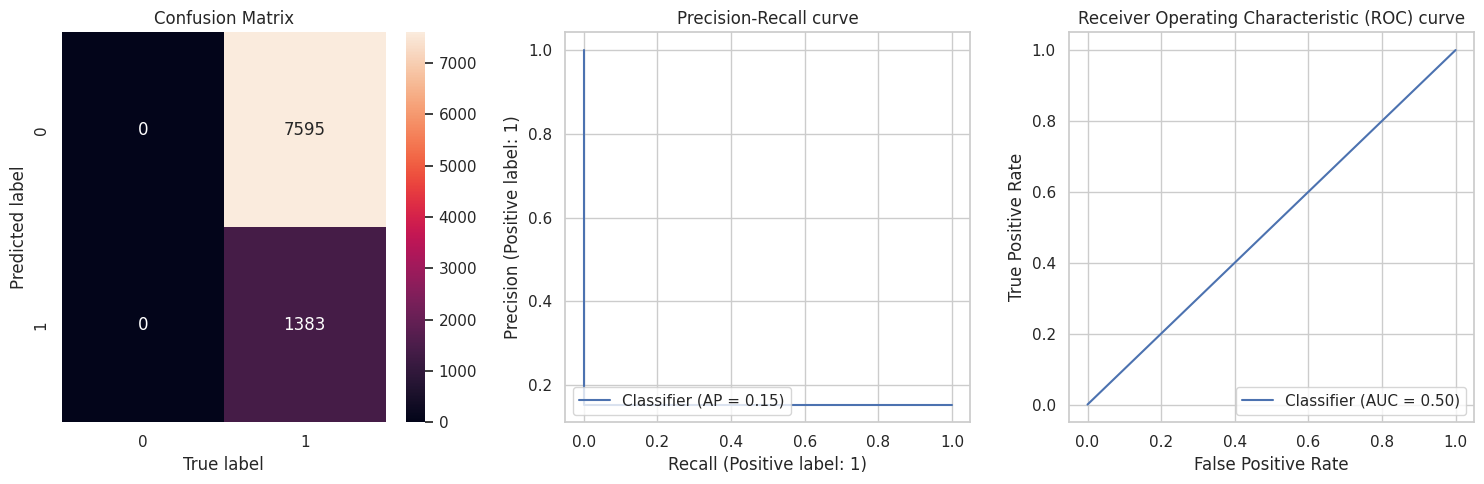

LSTM
f1-score: 26.70%
Precision: 15.40%
Recall: 100.00%
Accuracy: 15.40%


In [55]:
import numpy as np
import pandas as pd

!pip uninstall tensorflow
!pip install tensorflow==2.8.0

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf

# Assuming x_train and y_train are your preprocessed time-series data
# Ensure that x_train is a DataFrame or a 2D array

# Reshape x_train to have three dimensions (samples, time_steps, features)
time_steps = 1  # You may adjust this based on your data and how it should be split into time steps
features = x_train.shape[1]  # Assuming x_train has multiple features

x_train_reshaped = np.reshape(x_train.values, (x_train.shape[0], time_steps, features))
x_val_reshaped = np.reshape(x_val.values, (x_val.shape[0], time_steps, features))

# Function to create an LSTM model
def create_lstm_model(units, epochs, batch_size=32, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units, input_shape=(time_steps, features)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the Keras model as a scikit-learn estimator
lstm_model = KerasClassifier(build_fn=create_lstm_model, verbose=0)

# Define parameter grid for GridSearchCV
param_grid = {'units': [100, 150], 'epochs': [20, 30]}

# Define time series split
tscv = TimeSeriesSplit(n_splits=5)

# Define custom scorer
def custom_scorer(y_true, y_pred):
    # Your custom scoring logic here
    return f1_score(y_true, y_pred)

scorer = make_scorer(custom_scorer, greater_is_better=True)

# Create GridSearchCV object
grid_search = GridSearchCV(lstm_model, param_grid=param_grid, scoring=scorer, cv=tscv)

# Perform Grid Search
grid_search.fit(x_val_reshaped, y_val)

# Print best parameters
print("Best Parameters: ", grid_search.best_params_)

finalPrediction(grid_search.best_estimator_, "LSTM", results_table)

Shape of x_train_adasyn_reshaped: (31941, 1, 13)
Shape of y_train_adasyn: (31941,)
Best Parameters for LSTM_ADASYN:  {'epochs': 20, 'units': 100}


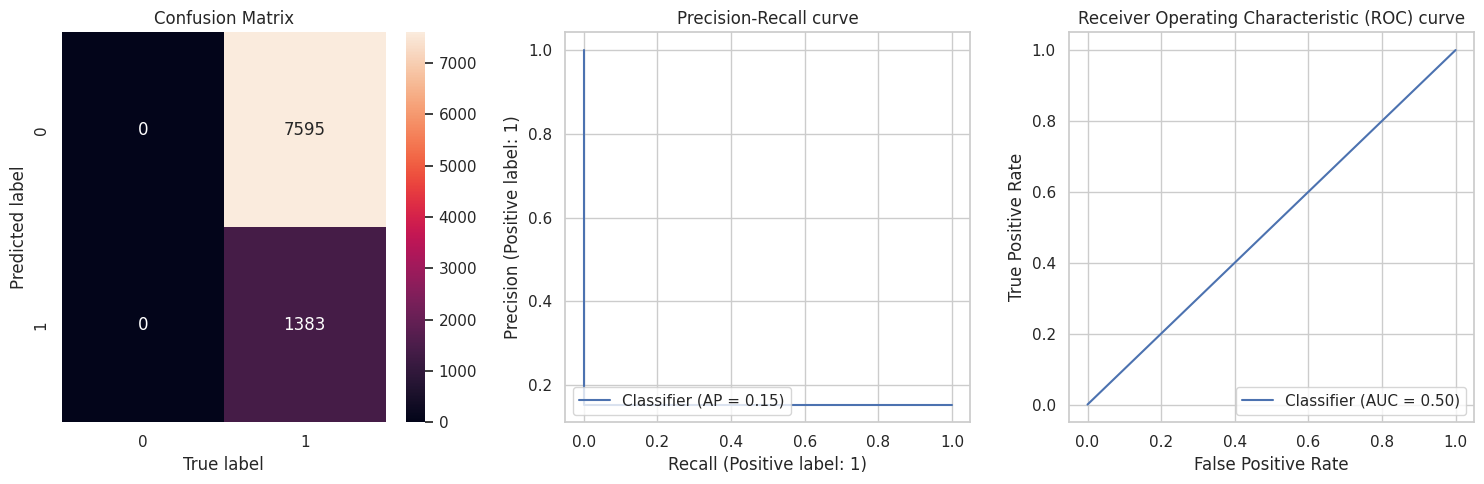

LSTM_ADASYN
f1-score: 26.70%
Precision: 15.40%
Recall: 100.00%
Accuracy: 15.40%


In [ ]:
# Create a new LSTM model for "LSTM_ADASYN"
lstm_model_adasyn = KerasClassifier(build_fn=create_lstm_model, verbose=0)

# Perform Grid Search for "LSTM_ADASYN"
grid_search_adasyn = GridSearchCV(lstm_model_adasyn, param_grid=param_grid, scoring=scorer, cv=tscv)

x_train_adasyn_reshaped = np.reshape(x_train_adasyn, (x_train_adasyn.shape[0], 1, features))
x_val_adasyn_reshaped = np.reshape(x_val_adasyn, (x_val_adasyn.shape[0], 1, features))

# Debugging prints
print("Shape of x_train_adasyn_reshaped:", x_train_adasyn_reshaped.shape)
print("Shape of y_train_adasyn:", y_train_adasyn.shape)

# Try fitting the model with a smaller dataset for debugging
grid_search_adasyn.fit(x_train_adasyn_reshaped, y_train_adasyn)

# Print best parameters for "LSTM_ADASYN"
print("Best Parameters for LSTM_ADASYN: ", grid_search_adasyn.best_params_)

# Use the correct model for prediction
finalPrediction(grid_search_adasyn.best_estimator_, "LSTM_ADASYN", results_table)

In [ ]:
print(results_table)

[['LSTM', 33.818315197456904, 20.35020600353149, 100.0, 39.7081755402094], ['LSTM_ADASYN', 31.47473827947201, 18.676569885212693, 100.0, 32.924927600801965]]


In [ ]:
# Tabulate and display and format the classifier results
results_table = pd.DataFrame(results_table,
                               columns = ["Classifier","F1-score","Precision","Recall","Accuracy"])

# Sort and style the DataFrame
full_results_sorted = results_table.sort_values(by='F1-score', ascending=False)
# Reset the index after sorting
full_results_sorted = full_results_sorted.reset_index(drop=True)
full_results_styled = full_results_sorted.style.background_gradient(cmap='Blues')

# Display the styled and sorted DataFrame
full_results_styled

,Classifier,F1-score,Precision,Recall,Accuracy
0,LSTM,26.696265,15.404322,100.000000,15.404322
1,LSTM_ADASYN,26.696265,15.404322,100.000000,15.404322


##RNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from imblearn.over_sampling import ADASYN

# Assuming x_train and y_train are your preprocessed time-series data
# Ensure that x_train is a DataFrame or a 2D array

# Reshape x_train to have three dimensions (samples, time_steps, features)
time_steps = 1  # You may adjust this based on your data and how it should be split into time steps
features = x_train.shape[1]  # Assuming x_train has multiple features

x_train_reshaped = np.reshape(x_train.values, (x_train.shape[0], time_steps, features))
x_val_reshaped = np.reshape(x_val.values, (x_val.shape[0], time_steps, features))

# Function to create an RNN model
def create_rnn_model(units, dropout_rate, epochs, batch_size, learning_rate):
    model = Sequential()
    model.add(SimpleRNN(units, input_shape=(time_steps, features), return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(SimpleRNN(units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())  # Add Flatten layer to make output 2D
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the Keras model as a scikit-learn estimator
rnn_model = KerasClassifier(build_fn=create_rnn_model, verbose=0)

# Define parameter grid for GridSearchCV
param_grid = {
    'units': [50, 100, 150],
    'dropout_rate': [0.2, 0.5, 0.7],
    'epochs': [20, 30, 40],
    'batch_size': [32, 64],
    'learning_rate': [1e-4, 1e-5]
}

# Define time series split
tscv = TimeSeriesSplit(n_splits=5)

# Define custom scorer
def custom_scorer(y_true, y_pred):
    # Your custom scoring logic here
    return f1_score(y_true, y_pred)

scorer = make_scorer(custom_scorer, greater_is_better=True)

# Create GridSearchCV object
grid_search_rnn = GridSearchCV(rnn_model, param_grid=param_grid, scoring=scorer, cv=tscv)

# Perform Grid Search
history = grid_search_rnn.fit(x_val_reshaped, y_val, verbose=2)

# Print best parameters
print("Best Parameters (RNN): ", history.best_params_)

# Assuming you have the finalPrediction function defined, you can use it as follows:
finalPrediction(history.best_estimator_, "RNN", results_table)

Streaming output truncated to the last 5000 lines.
Epoch 2/40
94/94 - 0s - loss: 0.0276 - accuracy: 0.9925 - 435ms/epoch - 5ms/step
Epoch 3/40
94/94 - 0s - loss: 0.0125 - accuracy: 0.9983 - 432ms/epoch - 5ms/step
Epoch 4/40
94/94 - 0s - loss: 0.0054 - accuracy: 0.9993 - 464ms/epoch - 5ms/step
Epoch 5/40
94/94 - 0s - loss: 0.0041 - accuracy: 0.9995 - 433ms/epoch - 5ms/step
Epoch 6/40
94/94 - 0s - loss: 0.0019 - accuracy: 0.9998 - 435ms/epoch - 5ms/step
Epoch 7/40
94/94 - 0s - loss: 0.0011 - accuracy: 1.0000 - 437ms/epoch - 5ms/step
Epoch 8/40
94/94 - 0s - loss: 8.6995e-04 - accuracy: 1.0000 - 446ms/epoch - 5ms/step
Epoch 9/40
94/94 - 0s - loss: 8.1226e-04 - accuracy: 1.0000 - 452ms/epoch - 5ms/step
Epoch 10/40
94/94 - 1s - loss: 4.7251e-04 - accuracy: 1.0000 - 518ms/epoch - 6ms/step
Epoch 11/40
94/94 - 1s - loss: 8.7691e-04 - accuracy: 0.9997 - 692ms/epoch - 7ms/step
Epoch 12/40
94/94 - 1s - loss: 3.4404e-04 - accuracy: 1.0000 - 718ms/epoch - 8ms/step
Epoch 13/40
94/94 - 1s - loss: 2.09

In [ ]:
# Print best parameters
print("Best Parameters (RNN): ", history.best_params_)

# Assuming you have the finalPrediction function defined, you can use it as follows:
finalPrediction(history.best_estimator_, "RNN", results_table)

In [ ]:
y_train

In [ ]:
# !pip install tensorflow --upgrade
# !pip uninstall keras

# # !pip install keras==2.9

# # !pip install patchify    #To install and import other mentioned libraries  in code
# # !pip install segmentation_models

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# import tensorflow as tf
# tf.keras.backend.clear_session()

# from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
# from sklearn.metrics import make_scorer

# # Reshape x_train to have three dimensions (samples, time_steps, features)

# time_steps = 1  # You may adjust this based on your data and how it should be split into time steps
# features = x_train.shape[1]  # Assuming 113 features

# x_train_reshaped = np.reshape(x_train.values, (x_train.shape[0], time_steps, features))

# # Now, x_train_reshaped should have the shape (samples, time_steps, features)

# # Function to create an LSTM model
# def create_lstm_model(units=50, epochs=10, batch_size=32):
#     model = Sequential()
#     model.add(LSTM(units))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['f1_score'])
#     return model

# # Wrap the Keras model as a scikit-learn estimator
# lstm_model = KerasClassifier(build_fn=create_lstm_model, verbose=0)

# # Define parameter grid for GridSearchCV
# param_grid = {'units': [50, 100], 'epochs': [10, 20, 30]}

# # Define time series split
# tscv = TimeSeriesSplit(n_splits=5)

# # Define custom scorer (if needed)
# def custom_scorer(y_train, y_pred):
#     # Your custom scoring logic here
#     return f1_score(y_train, y_pred)

# scorer = make_scorer(custom_scorer, greater_is_better=True)

# # Create GridSearchCV object
# grid_search = GridSearchCV(lstm_model, param_grid=param_grid, scoring=f1_score, cv=tscv)

# # Perform Grid Search
# grid_search.fit(x_train_reshaped, y_train)

# # Print best parameters
# print("Best Parameters: ", grid_search.best_params_)

# finalPrediction(grid_search.best_estimator_, "LSTM", results_table)

In [ ]:
# from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
# from sklearn.metrics import make_scorer, f1_score
# from imblearn.over_sampling import ADASYN
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from imblearn.pipeline import Pipeline
# import numpy as np

# # Assuming x_train and y_train are your preprocessed time-series data
# # Ensure that x_train is a DataFrame or a 2D array

# # Reshape x_train to have three dimensions (samples, time_steps, features)
# time_steps = 1  # You may adjust this based on your data and how it should be split into time steps
# features = x_train.shape[1]  # Assuming x_train has multiple features

# x_train_reshaped = np.reshape(x_train.values, (x_train.shape[0], time_steps, features))

# # Function to create an LSTM model
# def create_lstm_model(units, epochs, batch_size=32):
#     model = Sequential()
#     model.add(LSTM(units, input_shape=(time_steps, features)))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

# # Wrap the Keras model as a scikit-learn estimator
# lstm_model = KerasClassifier(build_fn=create_lstm_model, verbose=0)

# # Define parameter grid for GridSearchCV
# param_grid = {
#     'lstm__units': [50, 100],
#     'lstm__epochs': [10, 20],
#     'lstm__batch_size': [32],
#     'adasyn__sampling_strategy': ['minority']
# }

# # Define time series split
# tscv = TimeSeriesSplit(n_splits=5)

# # Define custom scorer
# def custom_scorer(y_true, y_pred):
#     # Your custom scoring logic here
#     return f1_score(y_true, y_pred)

# scorer = make_scorer(custom_scorer, greater_is_better=True)

# # Create a pipeline with ADASYN and KerasClassifier
# pipeline = Pipeline([
#     ('adasyn', ADASYN(sampling_strategy='minority')),
#     ('lstm', lstm_model)
# ])

# # Create GridSearchCV object
# grid_search_adasyn = GridSearchCV(pipeline, param_grid=param_grid, scoring=scorer, cv=tscv)

# # Perform Grid Search
# grid_search_adasyn.fit(x_train_reshaped, y_train)

# # Print best parameters
# print("Best Parameters: ", grid_search_adasyn.best_params_)
# finalPrediction(grid_search_adasyn.best_estimator_, "LSTM_ADASYN", results_table)